# **Aula 01 - Análise de Dados com Pandas**

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [9]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [10]:
df.shape

(133349, 11)

In [11]:
linhas, colunas = df.shape[0], df.shape[1]
print('linhas:', linhas)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [12]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


**Renomeando as colunas do DataFrame**

In [13]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


**Analisando quais sãos as categorias das colunas categóricas**


Nível de senioridade

In [14]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


Tipo de contrato

In [15]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


Regime de trabalho

In [16]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


Tamanho da empresa

In [17]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


**Modificando o nome das categorias:**

In [18]:
substituir_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(substituir_senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [19]:
substituir_contrato = {
    'FT': 'Integral',
    'CT': 'Contrato',
    'PT': 'Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(substituir_contrato)
df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato,394
Parcial,376
Freelancer,16


In [20]:
traducao_tamanho = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [21]:
substituir_remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(substituir_remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [22]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


Podemos também resumir as informações categóricas com o método describe(), exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [23]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


# **Aula 02 - Preparação e limpeza dos Dados**

In [24]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [26]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [27]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [28]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [32]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [33]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('int64'))
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# **Aula 03 - Visualização de Dados**

In [34]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

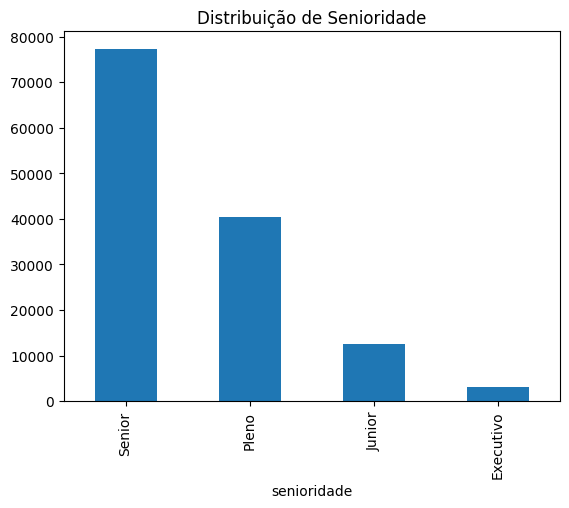

In [35]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [36]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

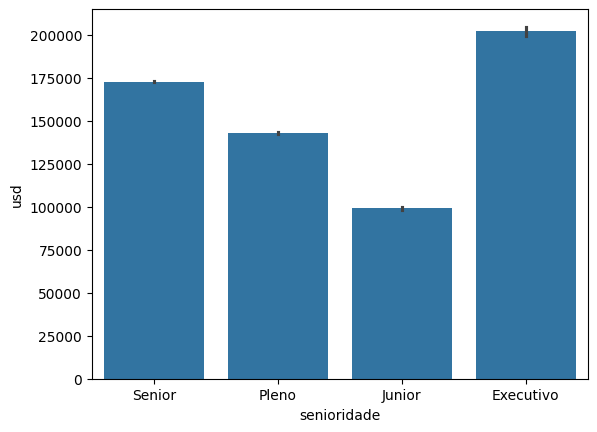

In [37]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [38]:
import matplotlib.pyplot as plt

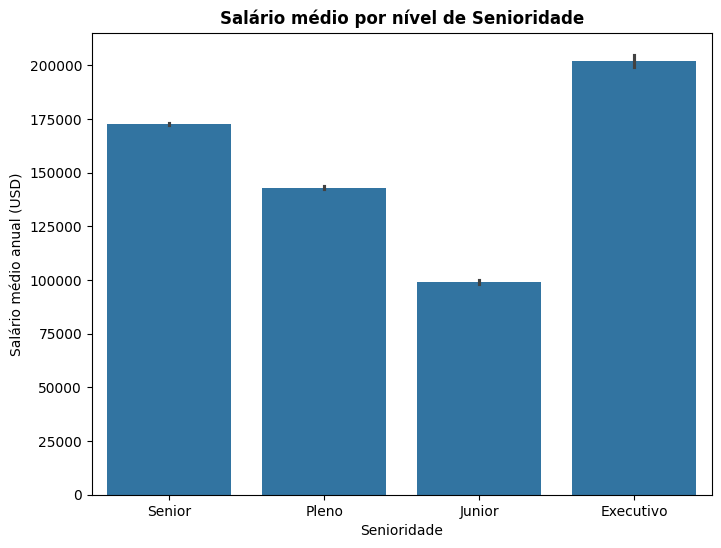

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de Senioridade', fontweight='bold')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [40]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [41]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [42]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

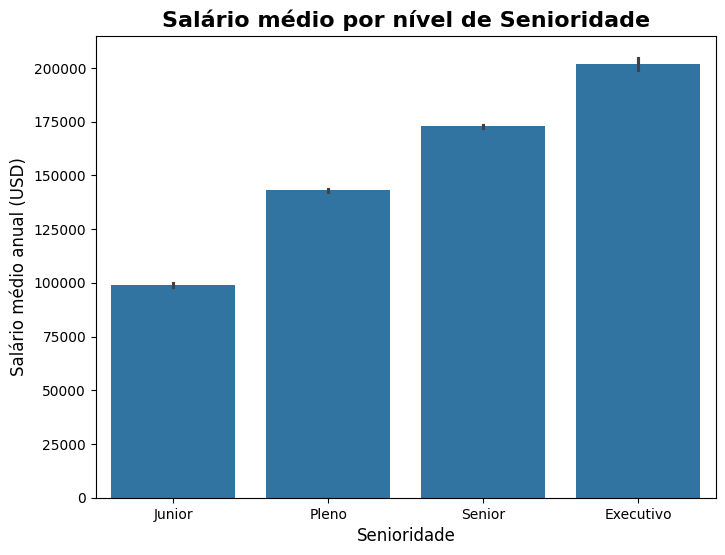

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por nível de Senioridade', fontsize=16, fontweight='bold')
plt.xlabel('Senioridade', fontsize=12)
plt.ylabel('Salário médio anual (USD)', fontsize=12)

plt.show()

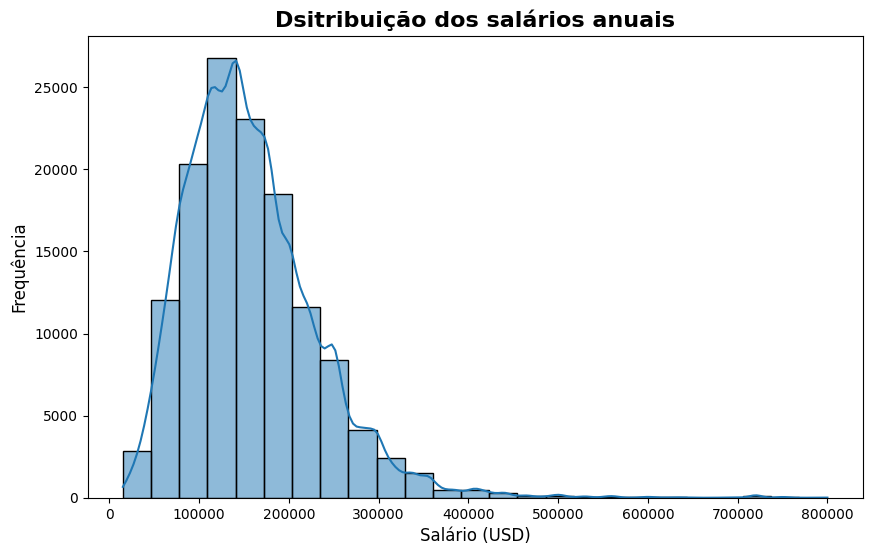

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_limpo['usd'], bins=25, kde=True)
plt.title('Dsitribuição dos salários anuais', fontsize=16, fontweight='bold')
plt.xlabel('Salário (USD)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()


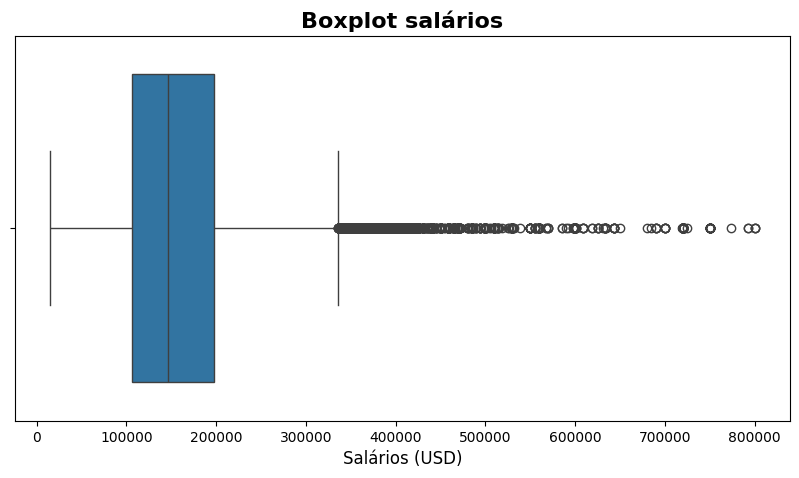

In [45]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot salários', fontsize=16, fontweight='bold')
plt.xlabel('Salários (USD)', fontsize=12)

plt.show()

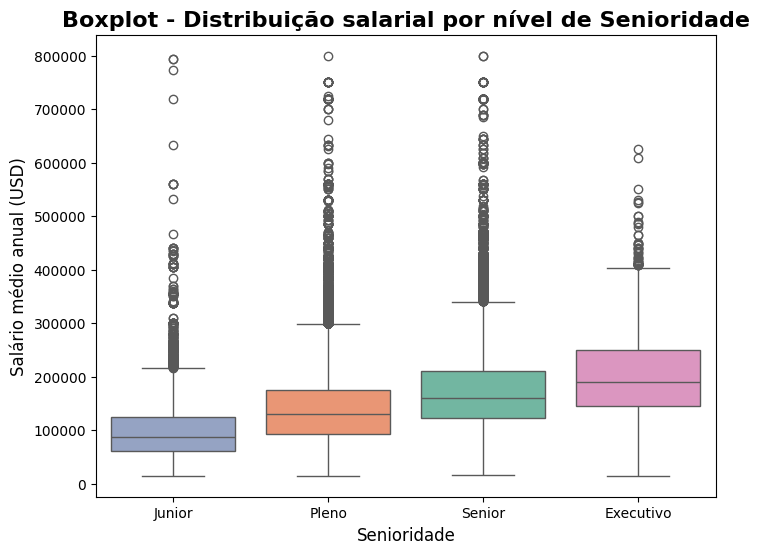

In [46]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8, 6))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot - Distribuição salarial por nível de Senioridade', fontsize=16, fontweight='bold')
plt.xlabel('Senioridade', fontsize=12)
plt.ylabel('Salário médio anual (USD)', fontsize=12)
plt.show()

In [47]:
import plotly.express as px

In [48]:
df_avg_salary_by_seniority = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_avg_salary_by_seniority, x='senioridade', y='usd',
             title='Salário médio por nível de Senioridade (Plotly)',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário médio anual (USD)'})

fig.show()

In [49]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
)

fig.show()

In [50]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
)

fig.update_traces(textinfo='percent+label')
fig.show()

In [51]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [52]:
!pip install pycountry

In [53]:
import pycountry

def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [54]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


# **Extra - Evolução do salário médio anual por ano e nível de senioridade**

Para obter uma perspectiva temporal da evolução salarial, é fundamental analisar se, ao longo dos anos, os valores estão crescendo, mantendo-se estáveis ou apresentando queda em cada nível de carreira.

O gráfico ideal para isso é um line plot com múltiplas linhas, uma para cada nível de senioridade.

In [55]:
df_media_ano = df_limpo.groupby(['ano', 'senioridade'])['usd'].mean().reset_index()

fig = px.line(
    df_media_ano,
    x='ano',
    y='usd',
    color='senioridade',
    markers=True,
    title='Evolução do Salário Médio por Senioridade (USD)',
    labels={
        'ano': 'Ano',
        'usd': 'Salário médio anual (USD)',
        'senioridade': 'Nível de Senioridade'
    }
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis_title='Salário médio anual (USD)',
    legend_title='Senioridade'
)

fig.show()

**Exportando os visuais**

In [56]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)